# Question 3 : (26 total points) Decision Trees
**In this question we will train a classifier to predict if a person is smiling or not.**

Instead of images of faces, our dataset consists of a set of 2D coordinates that encode the location of points on the faces (e.g. the corners of the eyes, the nose, the chin, etc) of a set of different people. Each row in the dataset is a different person and the columns (i.e. the input attributes) are pairs of 2D coordinates e.g. the first coordinate is $(x_0,y_0)$, the second is $(x_1, y_1)$, etc. Note, in the notation used in the lectures we often use $y_i$ to specify an output attribute, but here each (xi,yi) represents a 2D coordinate on the face and we will concatenate all D of them to form our attribute vector $[x_0, y_0, x_1, y_1, ..., x_D, y_D]$.
We assume that the location of these 2D points for a person that is smiling will be different than those for a person who is not smiling. Included with the 2D coordinates is an attribute called smiling, which is the binary class label that we want to predict. For a given row in the data, smiling = 1 indicates that that person is smiling.

The training data is contained in faces_train.csv, and the test data can be found in faces_test.csv. You should load the data into two different Pandas DataFrames using pandas.read_csv().

In [1]:
# Import packages
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
%matplotlib inline

/Users/davemalvin/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence
/Users/davemalvin/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# (a) (4 points) Load the data, taking care to separate the target binary class label we want to predict, smiling, from the input attributes. Summarise the main properties of both the training and test splits.

In [3]:
# Load the dataset
data_path = os.path.join(os.getcwd(), 'data', 'faces_train_data.csv')
dset_train = pd.read_csv(data_path, delimiter = ',')

data_path = os.path.join(os.getcwd(), 'data', 'faces_test_data.csv')
dset_test = pd.read_csv(data_path, delimiter = ',')

In [4]:
dset_train.head(5)

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,y63,x64,y64,x65,y65,x66,y66,x67,y67,smiling
0,-1.861,1.350,-1.835,0.892,-1.756,0.458,-1.704,-0.000,-1.625,-0.458,...,-0.160,0.498,-0.343,0.183,-0.389,-0.026,-0.389,-0.210,-0.389,0
1,-1.920,1.523,-1.920,1.066,-1.833,0.571,-1.746,0.076,-1.571,-0.343,...,-0.076,0.742,-0.076,0.262,-0.267,0.000,-0.305,-0.262,-0.267,1
2,-1.247,1.177,-1.256,0.806,-1.183,0.403,-0.983,0.008,-0.746,-0.371,...,-0.055,1.247,0.016,0.464,-0.506,0.173,-0.553,-0.082,-0.537,1
3,-1.660,1.812,-1.701,1.324,-1.660,0.801,-1.620,0.314,-1.498,-0.139,...,-0.070,0.891,-0.035,0.283,-0.279,0.000,-0.279,-0.283,-0.244,0
4,-1.776,1.551,-1.693,1.140,-1.549,0.729,-1.363,0.318,-1.115,-0.075,...,-0.093,0.764,0.056,0.227,-0.112,0.041,-0.150,-0.145,-0.131,0


In [6]:
dset_train.describe()

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,y63,x64,y64,x65,y65,x66,y66,x67,y67,smiling
count,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,...,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000
mean,-1.931962,1.455752,-1.920338,1.004314,-1.858298,0.545549,-1.744761,0.089065,-1.550913,-0.333587,...,-0.111277,0.687324,-0.106768,0.223960,-0.263222,0.005834,-0.288294,-0.211278,-0.269045,0.486458
std,0.590181,0.402155,0.552056,0.380052,0.532371,0.361070,0.523245,0.343751,0.491355,0.321495,...,0.050815,0.209837,0.148709,0.086788,0.148332,0.073380,0.147636,0.083300,0.148305,0.499869
min,-3.979000,-2.111000,-3.872000,-2.054000,-3.737000,-1.940000,-3.468000,-2.180000,-3.071000,-2.345000,...,-0.319000,-0.441000,-0.897000,-0.448000,-1.142000,-0.597000,-1.162000,-0.746000,-1.154000,0.000000
25%,-2.241000,1.247750,-2.204000,0.812750,-2.142250,0.361750,-2.039250,-0.086000,-1.839000,-0.505000,...,-0.142000,0.582000,-0.191000,0.188000,-0.356000,-0.024000,-0.383000,-0.252000,-0.361000,0.000000
50%,-1.952000,1.456000,-1.931000,1.011000,-1.854000,0.561000,-1.751000,0.104000,-1.576500,-0.319000,...,-0.110000,0.701000,-0.102000,0.224000,-0.242000,0.000000,-0.266000,-0.213000,-0.247000,0.000000
75%,-1.628750,1.676000,-1.626000,1.212250,-1.557750,0.750000,-1.451000,0.285250,-1.276000,-0.141000,...,-0.078000,0.823250,-0.018000,0.266000,-0.147000,0.035250,-0.169000,-0.175000,-0.152000,1.000000
max,1.984000,3.461000,1.617000,3.132000,1.213000,2.747000,0.808000,2.473000,0.655000,2.296000,...,0.288000,1.387000,0.725000,0.725000,0.336000,0.544000,0.144000,0.369000,0.318000,1.000000


In [7]:
dset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Columns: 137 entries, x0 to smiling
dtypes: float64(136), int64(1)
memory usage: 5.0 MB


In [8]:
dset_test.describe()

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,y63,x64,y64,x65,y65,x66,y66,x67,y67,smiling
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,...,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,-1.924105,1.466505,-1.913906,1.015347,-1.854442,0.556578,-1.742358,0.100410,-1.549113,-0.322024,...,-0.109595,0.686934,-0.101417,0.221621,-0.256826,0.004443,-0.281469,-0.211166,-0.262411,0.493333
std,0.586384,0.412054,0.548511,0.389851,0.529543,0.368793,0.524712,0.348176,0.498277,0.322613,...,0.049170,0.202535,0.147125,0.082986,0.141866,0.073667,0.139187,0.087036,0.137586,0.500164
min,-3.846000,-2.116000,-3.673000,-2.341000,-3.487000,-2.539000,-3.287000,-2.624000,-3.005000,-2.511000,...,-0.280000,-0.133000,-0.672000,-0.282000,-1.087000,-0.507000,-1.109000,-0.732000,-1.087000,0.000000
25%,-2.250000,1.243000,-2.220250,0.816000,-2.150000,0.364000,-2.049000,-0.092250,-1.843000,-0.502250,...,-0.138000,0.580000,-0.180000,0.185750,-0.347000,-0.027000,-0.374000,-0.254000,-0.353000,0.000000
50%,-1.949000,1.465000,-1.921000,1.016000,-1.860500,0.562500,-1.758500,0.105500,-1.582500,-0.316500,...,-0.108000,0.704000,-0.097500,0.225000,-0.240000,0.000000,-0.263000,-0.213000,-0.244000,0.000000
75%,-1.626250,1.686500,-1.627750,1.221500,-1.562750,0.753500,-1.448500,0.302000,-1.282000,-0.128500,...,-0.078000,0.816000,-0.000000,0.264000,-0.142000,0.036000,-0.166000,-0.175000,-0.155000,1.000000
max,1.613000,3.641000,1.067000,3.205000,0.522000,2.718000,0.000000,2.510000,0.309000,2.213000,...,0.248000,1.269000,0.702000,0.603000,0.248000,0.411000,0.041000,0.259000,0.168000,1.000000


In [9]:
dset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Columns: 137 entries, x0 to smiling
dtypes: float64(136), int64(1)
memory usage: 1.3 MB


In [12]:
# Separate the target binary class label we want to predict
Xtest = dset_test.iloc[:,:-1]
ytest = dset_test.iloc[:,-1]
Xtrain = dset_train.iloc[:,:-1]
ytrain = dset_train.iloc[:,-1]

# (b) (4 points) Even though the input attributes are high dimensional, they actually consist of a set of 2D coordinates representing points on the faces of each person in the dataset. Create a scatter plot of the average location for each 2D coordinate. 
One for `(i) smiling` and `(ii) one not smiling faces`. For instance, in the case of smiling faces, you would average each of the rows where `smiling = 1`. You can plot both on the same figure, but use different colors for each of the two cases. Comment on any difference you notice between the two sets of points.
Hint: Your plot should contain two faces.


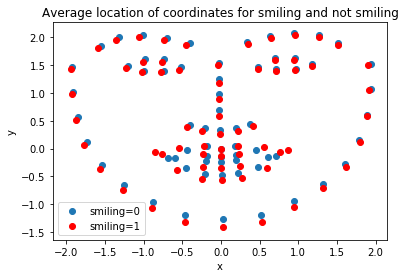

In [76]:
# Group dataset into two by the attribute 'smiling'
smile, not_smile = [x for _,x in dset_train.groupby(dset_train['smiling'] == 0)]

# We do not need the attribute 'smiling' 
not_smile.drop(["smiling"], axis=1, inplace=True)

noOfColumns = not_smile.shape[1]

listX = []
list_y = []
# Calculate the average of each column that represents an x-coordinate
for i in range(0,noOfColumns,2):
    avgX = np.sum(not_smile.iloc[:,i].values)/not_smile.shape[0]
    listX.append(avgX)

# Calculate the average of each column that represents a y-coordinate
for i in range(1,noOfColumns,2):
    avg_y = np.sum(not_smile.iloc[:,i].values)/not_smile.shape[0]
    list_y.append(avg_y)
    
plt.scatter(listX,list_y)

# Repeat for dataset where smiling equals to 1
smile.drop(["smiling"], axis=1, inplace=True)
listX = []
list_y = []
for i in range(0,noOfColumns,2):
    avgX = np.sum(smile.iloc[:,i].values)/smile.shape[0]
    listX.append(avgX)

for i in range(1,noOfColumns,2):
    avg_y = np.sum(smile.iloc[:,i].values)/smile.shape[0]
    list_y.append(avg_y)
    
plt.scatter(listX,list_y,c='r')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Average location of coordinates for smiling and not smiling')
plt.legend(['smiling=0','smiling=1'])
plt.show()